In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
def balancedata(x):
    if x < 72:
        return 'Class E'
    elif x >= 72 and x < 448:
        return 'Class D'
    elif x >= 448 and x < 1428:
        return 'Class C'
    elif x >= 1428 and x < df['balance'].quantile(0.99):
        return 'Class B'
    else:
        return 'Class A'

In [6]:
def datachange(path):
    df = pd.read_csv(path, sep=';')
    df['default'] = df['default'].apply(lambda x:True if x=='yes' else False)
    df['y'] = df['y'].apply(lambda x:True if x=='yes' else False)
    df['housing'] = df['housing'].apply(lambda x:True if x=='yes' else False)
    df['loan'] = df['loan'].apply(lambda x:True if x=='yes' else False)
    df['previous_bool'] = df['previous'].apply(lambda x:True if x!=0 else False)
    df['balance_class'] = df['balance'].apply(lambda x:balancedata(x))

    to_drop = ['previous', 'day', 'poutcome', 'pdays']
    df.drop(columns= to_drop, inplace=True)

    return df

    

In [7]:
df_new = datachange('bank.csv')

In [8]:
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y,previous_bool,balance_class
0,58,management,married,tertiary,False,2143,True,False,unknown,may,261,1,False,False,Class B
1,44,technician,single,secondary,False,29,True,False,unknown,may,151,1,False,False,Class E
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,may,76,1,False,False,Class E
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,may,92,1,False,False,Class B
4,33,unknown,single,unknown,False,1,False,False,unknown,may,198,1,False,False,Class E


In [9]:
x = df_new.drop(columns=['y','balance','duration'])
y = df_new['y']

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
x = oe.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), {}, n_jobs=1, cv=10, refit='recall')
dt.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={}, refit='recall')

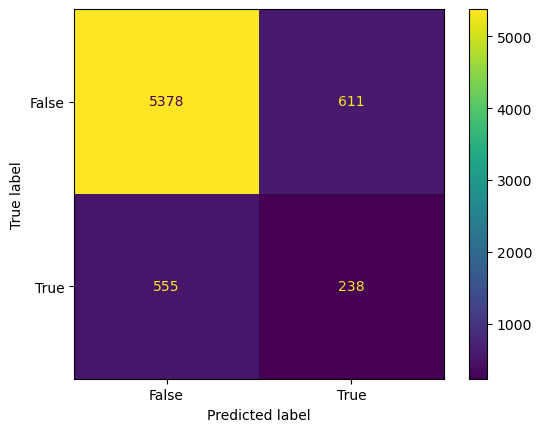

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test)


In [15]:
pred = dt.predict(x_test)

In [16]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

       False       0.90      0.91      0.90      5933
        True       0.30      0.28      0.29       849

    accuracy                           0.83      6782
   macro avg       0.60      0.59      0.60      6782
weighted avg       0.82      0.83      0.83      6782



In [17]:
params_dt = {
    "max_depth" : [5, 10, 15, 20, 25, 30, None],
    "criterion": ['gini', 'entropy'],
    "min_samples_split":[2, 3],
    "min_samples_leaf": [1,2]
}

In [18]:
model_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    params_dt,
    cv=10,
    verbose=2
)

In [19]:
model_dt.fit(x_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]},
             verbose=2)

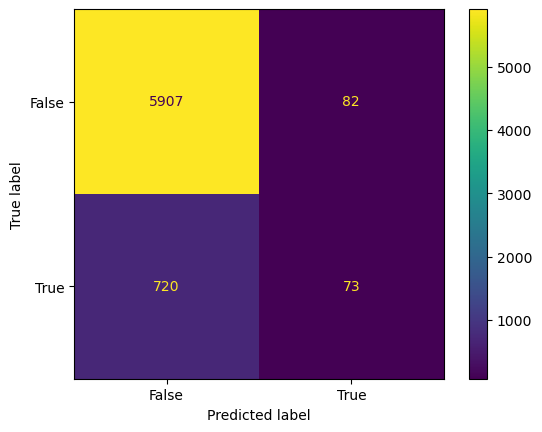

In [20]:
ConfusionMatrixDisplay.from_estimator(model_dt, x_test, y_test)

In [21]:
pred_dt = model_dt.predict(x_test)

In [23]:
print(classification_report(pred_dt, y_test))

              precision    recall  f1-score   support

       False       0.99      0.89      0.94      6627
        True       0.09      0.47      0.15       155

    accuracy                           0.88      6782
   macro avg       0.54      0.68      0.55      6782
weighted avg       0.97      0.88      0.92      6782

